<a href="https://colab.research.google.com/github/Codedestructor56/Bacteria-detection/blob/master/Count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.0/617.0 kB 6.6 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
import ultralytics

In [4]:
if os.path.exists("drive/MyDrive/best.pt"):
  model_path="drive/MyDrive/best.pt"

In [5]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


Saving bact.jpeg to bact.jpeg
Uploaded file: bact.jpeg


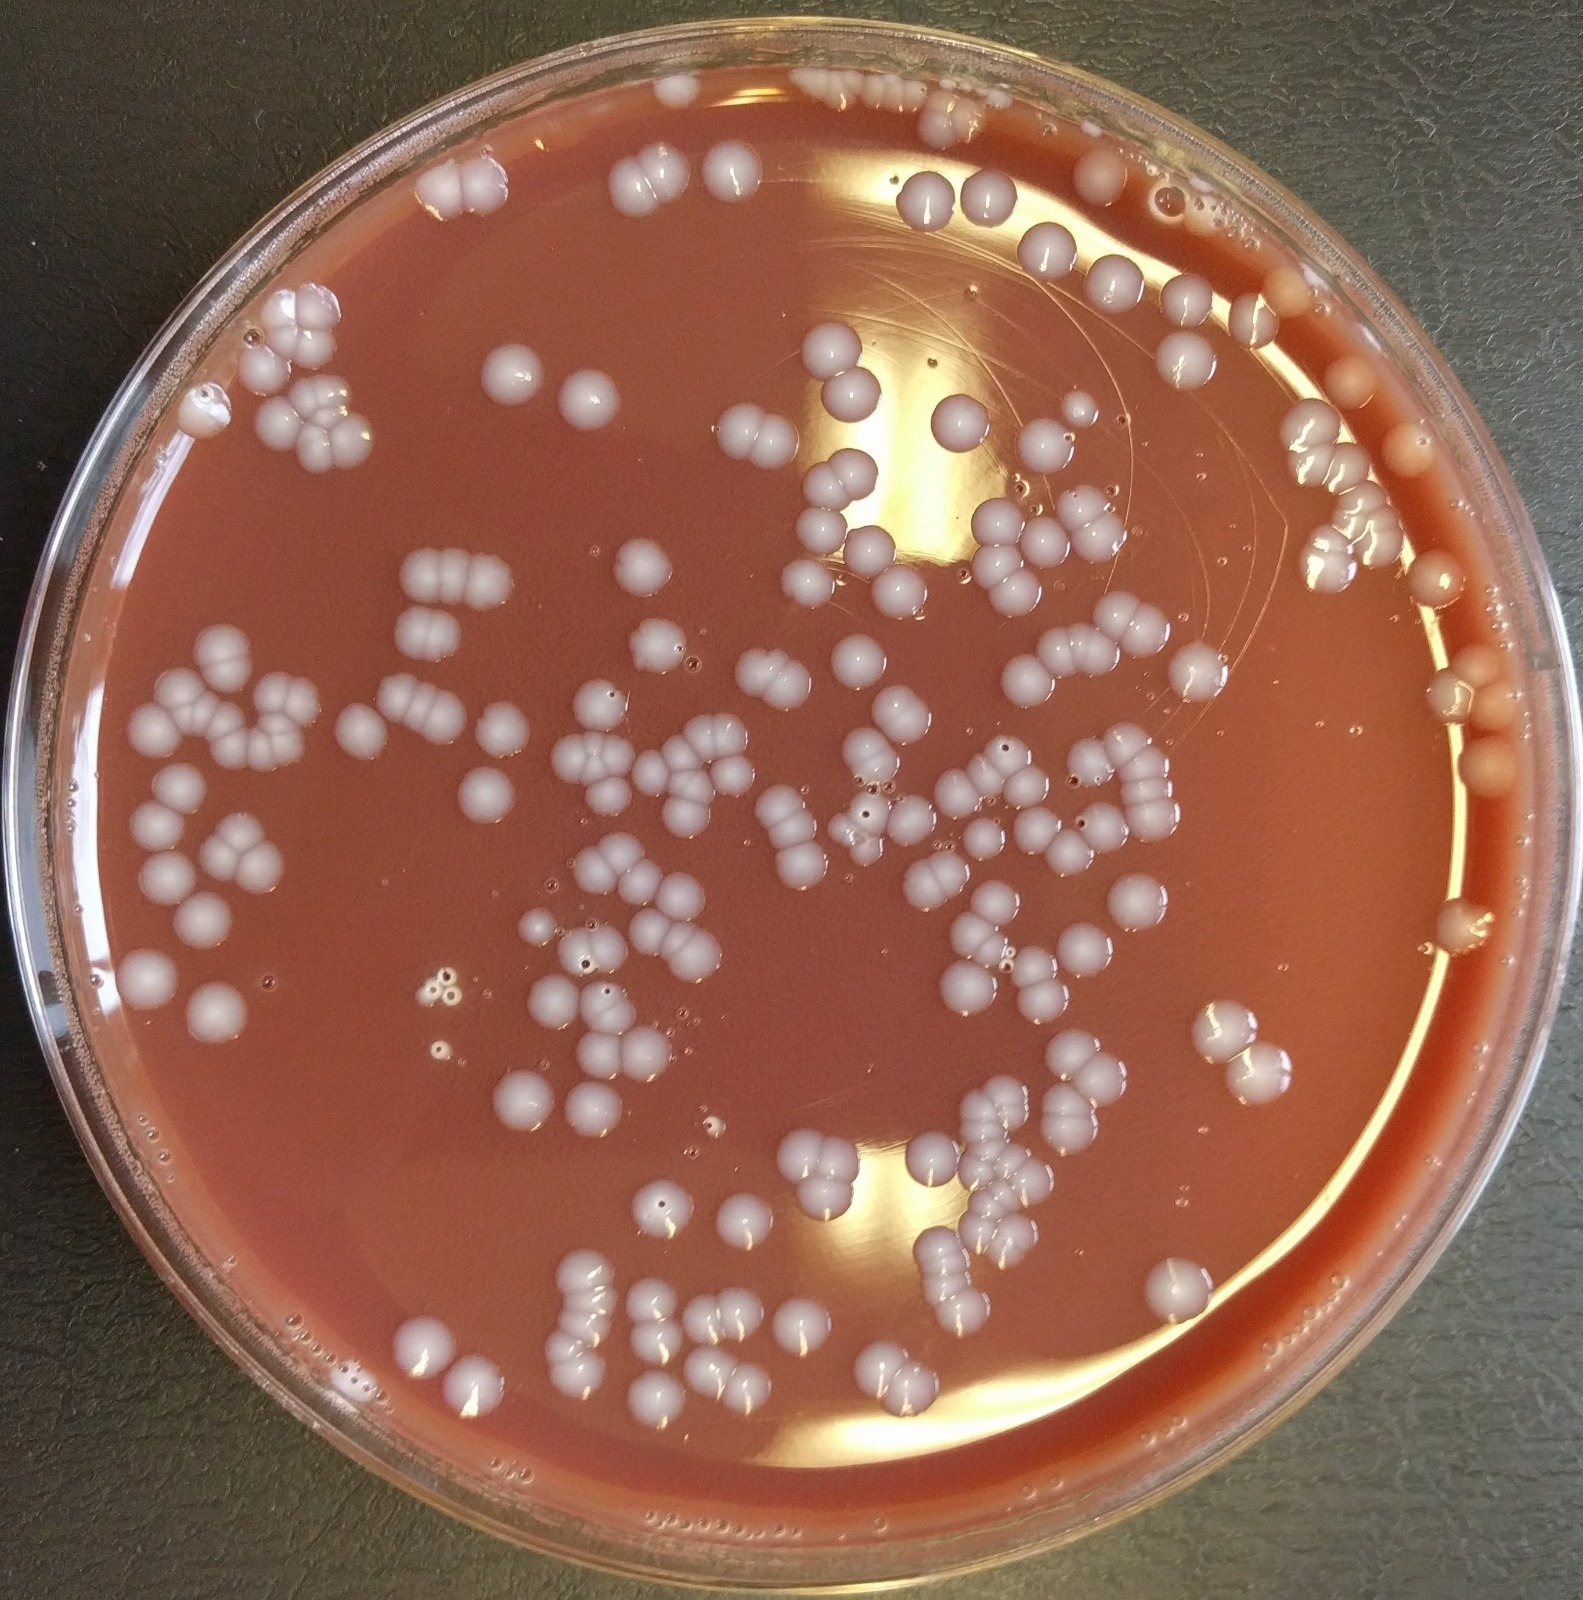

In [6]:
from IPython.display import Image

Image(filename)

In [8]:
from PIL import Image
import math
im=Image.open(filename)
im_lis=[]
base_name,extension=os.path.splitext(filename)
if im.size[0]>500 or im.size[1]>500:
  width_splits=math.ceil(im.size[0]/500)
  height_splits=math.ceil(im.size[1]/500)
  for i in range(width_splits):
    for j in range(height_splits):
      left=i*500
      upper=j*500
      right=min((i+1)*500,im.size[0])
      lower=min((j+1)*500,im.size[1])
      part_image=im.crop((left,upper,right,lower))
      #print(f"For iteration {i}_{j}:({left},{upper}),({right},{lower})")
      im_name=f"divided_im{i}_{j}{extension}"
      part_image.save(os.path.join(os.getcwd(),im_name))
      im_lis.append(os.path.join(os.getcwd(),im_name))
else:
  im_lis.append(filename)

In [12]:
from ultralytics import YOLO
model = YOLO(model_path)
results=[model.predict(
   source=img,
   conf=0.5,
    save=True
) for img in im_lis]



image 1/1 /content/divided_im0_0.jpeg: 640x640 3 bacterias, 2572.5ms
Speed: 5.5ms preprocess, 2572.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

image 1/1 /content/divided_im0_1.jpeg: 640x640 16 bacterias, 2607.2ms
Speed: 6.8ms preprocess, 2607.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

image 1/1 /content/divided_im0_2.jpeg: 640x640 1 bacteria, 1659.1ms
Speed: 7.4ms preprocess, 1659.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2

image 1/1 /content/divided_im0_3.jpeg: 128x640 (no detections), 360.1ms
Speed: 1.8ms preprocess, 360.1ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 640)
Results saved to runs/detect/predict2

image 1/1 /content/divided_im1_0.jpeg: 640x640 7 bacterias, 1558.0ms
Speed: 5.2ms preprocess, 1558.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
R

In [19]:
tensor_boxes=[result[0].boxes.xyxy for result in results]
boxes=[]
for box in tensor_boxes:
  for sub_box in box:
    boxes.append(np.array(sub_box))
boxes

[array([     216.45,      178.07,      443.74,      499.73], dtype=float32),
 array([     25.751,      189.38,      375.14,         500], dtype=float32),
 array([      134.2,      133.68,      415.37,      483.32], dtype=float32),
 array([     113.91,      160.42,      411.07,      499.96], dtype=float32),
 array([     123.75,      71.299,      415.59,      310.69], dtype=float32),
 array([     130.86,      97.704,      439.59,      398.59], dtype=float32),
 array([     104.21,      85.272,      350.95,      358.97], dtype=float32),
 array([      105.1,      66.375,      357.27,      288.93], dtype=float32),
 array([     0.1925,      67.994,      374.84,      299.23], dtype=float32),
 array([  0.0093222,       140.5,      367.45,         500], dtype=float32),
 array([     195.95,       38.07,         500,      233.27], dtype=float32),
 array([     88.111,      44.181,      352.24,      237.96], dtype=float32),
 array([     82.293,      189.32,      323.12,      499.96], dtype=float32),

In [20]:
print(f"Number of instances detected:{len(boxes)}")

Number of instances detected:91
